<a href="https://colab.research.google.com/github/sara-gaballa/ADHD-detection-from-EEG-signals-using-ML-and-DL-models/blob/main/Data2_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##Features functions

In [ ]:
pip install entropy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for entropy: filename=entropy-0.1.5-py3-none-any.whl size=7177 sha256=72c3ecbce9adae1ac98d1a8d918a23d279717821f06ce2719197187d27ffcf6c
  Stored in directory: /root/.cache/pip/wheels/7b/ae/a5/3981344d7be76f408fc6c9c280cb1706f033d4c1018913897a
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=4e834cd28ea4bad1e4702b8b61899f4a0cc32ec2965880de799b2a41bc268e2e
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built entropy docopt


In [ ]:
pip install antropy

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 27.2 MB/s eta 0:00:00
  Created wheel for antropy: filename=antropy-0.1.6-py3-none-any.whl size=16878 sha256=d569499731c71600fe082f46a5a0fdf8cfa00296032d0fe26a51de558b93d2c3
  Stored in directory: /root/.cache/pip/wheels/98/22/06/e91d7bb213c7133d5e2eb34258623e1e19928d5f05e1ee6812
Successfully built antropy
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [ ]:
def bandpower(data, sf, band, window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp

In [ ]:
pip install git+https://github.com/forrestbao/pyeeg.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-86ihdocx
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-86ihdocx
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28111 sha256=7e91aeb3f57e8dfe4ad10b39484c5501be5ee21bcaa8d9ace1f0a21fd694d3ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-alwxp5ol/wheels/a8/c4/1a/cee09dcc12a11620066d35ace42e3c1e3bfbcc1db3a0ce7788
Successfully built pyeeg


In [ ]:
pip install git+https://github.com/raphaelvallat/entropy.git

  Cloning https://github.com/raphaelvallat/entropy.git to /tmp/pip-req-build-qovkt7on
  Running command git clone --filter=blob:none --quiet https://github.com/raphaelvallat/entropy.git /tmp/pip-req-build-qovkt7on
  Resolved https://github.com/raphaelvallat/entropy.git to commit 216cd1c10148fe13fc02f56c69724028daec58c8
  Preparing metadata (setup.py) ... done
  Created wheel for entropy: filename=entropy-0.1.3-py3-none-any.whl size=16108 sha256=fc77c484962310528e25dbf3ab4720787b7ca6f09bae12057384377f37404526
  Stored in directory: /tmp/pip-ephem-wheel-cache-96tsf6e5/wheels/86/6f/2e/c44cb24d79e0dcdbb5938aae85d12613d99d925b56086cd096
Successfully built entropy
  Attempting uninstall: entropy
    Found existing installation: entropy 0.1.5
    Uninstalling entropy-0.1.5:
      Successfully uninstalled entropy-0.1.5


In [ ]:
from scipy import stats
import scipy as sp
import antropy as ent

def mean(data):
    return np.mean(data,axis=-1)

def std(data):
    return np.std(data,axis=-1)

def ptp(data):
    return np.ptp(data,axis=-1)

def var(data):
        return np.var(data,axis=-1)

def minim(data):
      return np.min(data,axis=-1)

def maxim(data):
      return np.max(data,axis=-1)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=-1))

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)

def median(data):
    return np.median(data, axis=-1)

def q1(data):
    return np.quantile(data, 0.25, axis=-1)

def q3(data):
    return np.quantile(data, 0.75, axis=-1)

def skewness(data):
    return stats.skew(data,axis=-1)

def kurtosis(data):
    return stats.kurtosis(data,axis=-1)

def mobility(data):
  mob, comp = ent.hjorth_params(data)
  return mob

def complexity(data):
  mob, comp = ent.hjorth_params(data)
  return comp

def power(data):
  return np.sum(data*data, 1) / data.size

def energy(data):
  return np.sum(data*data, 1)

def fft(data):
  return np.fft(data, axis=-1)

PyEEG features

In [ ]:
import pyeeg
from pyeeg import bin_power, pfd, hfd, svd_entropy, spectral_entropy, dfa, fisher_info, ap_entropy, hurst

def pfd2(data):
  res = []
  for channel in data:
    res.append(pfd(channel))
  return res

def hfd2(data):
  res = []
  for channel in data:
    res.append(higuchi_fd(channel))
  return res

def svd(data):
  res = []
  for channel in data:
    res.append(svd_entropy(channel))
  return res

def spe(data):
  res = []
  band = [0.5,4,8,12,30,64]
  fs = 128
  for channel in data:
    Power, Power_Ratio = bin_power(channel, band, fs)
    res.append(spectral_entropy(channel, band, fs, Power_Ratio=Power_Ratio))
  return res

def dfa2(data):
  res = []
  for channel in data:
    res.append(detrended_fluctuation(channel))
  return res

def fish(data):
  res = []
  for channel in data:
    res.append(fisher_info(channel))
  return res

def ape(data):
  res = []
  for channel in data:
    res.append(ap_entropy(channel))
  return res

def hurst2(data):
  res = []
  for channel in data:
    res.append(hurst(channel))
  return res

In [ ]:
from entropy import petrosian_fd, katz_fd, higuchi_fd, detrended_fluctuation

/usr/local/lib/python3.10/dist-packages/entropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('float64(float64[:], int32)')


In [ ]:
def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),median(data), q1(data), q3(data),
                          rms(data),abs_diffs_signal(data), mobility(data), complexity(data), power(data), energy(data),
                          skewness(data),kurtosis(data),spe(data),katz_fd(data),hfd2(data),dfa2(data),
                           petrosian_fd(data),hurst2(data)),axis=-1)

##Data 2 importing

In [ ]:
import os
import pandas as pd

folder_path = '/content/drive/MyDrive/Dataset 2/data files'

In [ ]:
pip install mat73

In [ ]:
import scipy.io
import os
import numpy as np
import mat73

# Prefix and suffix of the filenames
prefix = 'd'
suffix = '.mat'
# Range of file numbers to read
start_num = 1
end_num = 7

# Initialize an empty list to store the extracted data
data_list = []

# Loop over the desired file numbers and read the corresponding .mat files
for num in range(start_num, end_num+1):
  # Construct the filename
  filename = prefix + str(num) + suffix
  filepath = os.path.join(folder_path, filename)

  # Check if file exists
  if os.path.exists(filepath):
      # Load the .mat file and extract the desired variables
      mat = mat73.loadmat(filepath)

      # Append the extracted data to the list of data
      data_list.append(np.array(mat[prefix+str(num)]))
  else:
      print('File ' + filename + ' does not exist.')

File d1.mat does not exist.
File d2.mat does not exist.
File d3.mat does not exist.
File d4.mat does not exist.
File d5.mat does not exist.
File d6.mat does not exist.
File d7.mat does not exist.


In [ ]:
# Concatente all arrays
data = data_list[0]
for i in range(1, 7):
  data = np.concatenate((data, data_list[i]))
print(data.shape)
del(data_list)

IndexError: ignored

In [ ]:
import numpy as np

control_trials = 10129
ADD_trials = 13031
ADHD_trials = 10742

HC = np.zeros(control_trials)
ADD = np.ones(ADD_trials + ADHD_trials )
# ADHD = np.full(ADHD_trials, "ADHD")  # Fill with 2
# y = np.concatenate((HC, ADD, ADHD))
y = np.concatenate((HC, ADD))
print(y.shape)


In [ ]:
# import numpy as np
# from scipy import stats
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# from tqdm import tqdm_notebook
# features=[]
# for trial in tqdm_notebook(data):
#     features.append(concatenate_features(trial))
# features=np.array(features)
# features.shape

# import numpy as np
# # Saving the array
# np.savetxt("/content/drive/MyDrive/Dataset 2/" + "features_pyeeg2_Data2.csv", features, delimiter=",")

In [ ]:
# import numpy as np
# # Saving the array
# np.savetxt("/content/drive/MyDrive/Dataset 2/" + "features_pyeeg2_Data2.csv", features, delimiter=",")

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import welch
# from scipy.integrate import simps

# window_size = 2

# # Function to compute PSD features for a single EEG channel
# def compute_psd_features(eeg_channel, fs):
#     # Compute the Power Spectral Density using Welch's method
#     f, psd = welch(eeg_channel, fs=fs, nperseg=fs*window_size)  # Adjust nperseg based on your data

#     # Define frequency bands (adjust as needed)
#     delta_band = (0.5, 4)     # Delta (0.5-4 Hz)
#     theta_band = (4, 8)       # Theta (4-8 Hz)
#     alpha_band = (8, 13)      # Alpha (8-12 Hz)
#     beta_band = (13, 30)      # Beta (12-30 Hz)
#     gamma_band = (30, 64)     # Gamma (30-64 Hz)

#     # Calculate the mean power in each frequency band
#     delta_power = np.mean(psd[(f >= delta_band[0]) & (f < delta_band[1])])

#     theta_power = np.mean(psd[(f >= theta_band[0]) & (f < theta_band[1])])

#     alpha_power = np.mean(psd[(f >= alpha_band[0]) & (f < alpha_band[1])])

#     beta_power = np.mean(psd[(f >= beta_band[0]) & (f < beta_band[1])])

#     gamma_power = np.mean(psd[(f >= gamma_band[0]) & (f < gamma_band[1])])

#     return delta_power, theta_power, alpha_power, beta_power, gamma_power



In [ ]:
# # Sample 3D EEG data (replace this with your actual EEG data)
# num_samples = data.shape[0]
# num_channels = data.shape[1]
# num_timesteps = data.shape[2]
# fs = 500  # Sampling frequency in Hz

# # Initialize lists to store PSD features for each EEG channel
# delta_powers = []
# theta_powers = []
# alpha_powers = []
# beta_powers = []
# gamma_powers = []

# # Loop through each EEG sample and each EEG channel to compute PSD features
# for sample in range(num_samples):
#     sample_delta_powers = []
#     sample_theta_powers = []
#     sample_alpha_powers = []
#     sample_beta_powers = []
#     sample_gamma_powers = []

#     for channel in range(num_channels):
#         eeg_channel = data[sample, channel, :]
#         delta_power, theta_power, alpha_power, beta_power, gamma_power = compute_psd_features(eeg_channel, fs)

#         sample_delta_powers.append(delta_power)
#         sample_theta_powers.append(theta_power)
#         sample_alpha_powers.append(alpha_power)
#         sample_beta_powers.append(beta_power)
#         sample_gamma_powers.append(gamma_power)

#     delta_powers.append(sample_delta_powers)
#     theta_powers.append(sample_theta_powers)
#     alpha_powers.append(sample_alpha_powers)
#     beta_powers.append(sample_beta_powers)
#     gamma_powers.append(sample_gamma_powers)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# # Combine the extracted PSD features into a single feature matrix
# psd_features = np.column_stack((delta_powers, theta_powers, alpha_powers, beta_powers, gamma_powers))
# nfeatures = np.hstack((features, psd_features))

Save the calculated features


In [ ]:
# # Saving the array
# np.savetxt("/content/drive/MyDrive/Dataset 2/" + "ffffffeatures_pyeeg2_Data2.csv", nfeatures, delimiter=",")

Reading from file


In [ ]:
# Reading the csv into an array (for the first features)
nnfeatures = np.genfromtxt("/content/drive/MyDrive/Dataset 2/features_pyeeg2_Data2.csv", delimiter=",")
print(nnfeatures.shape)

FileNotFoundError: ignored

In [ ]:
# Reading the csv into an array (for both features)
nfeatures = np.genfromtxt("/content/drive/MyDrive/Dataset 2/ffffffeatures_pyeeg2_Data2.csv", delimiter=",")
print(nfeatures.shape)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt  # Importing the 'pyplot' module
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import MultiTaskLasso, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
import numpy as np

# Assuming nfeatures is your input numpy array
# Replace NaN values with zeros
nfeatures_cleaned = np.nan_to_num(nfeatures, nan=0.0)



### Mariam

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(nfeatures_cleaned, y, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
search = GridSearchCV(pipeline,
                      {'model__alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1]},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [ ]:
search.fit(X_train,y_train)
search.best_params_

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
f = [i for i in range(X_train.shape[1])]


In [ ]:
sel = np.array(f)[importance > 0.02]
sel.shape

In [ ]:
sel

In [ ]:
X_train_lasso_selected = X_train[:, sel]
X_test_lasso_selected = X_test[:, sel]
X_train_lasso_selected.shape

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                 Model Parameters  Accuracy  Precision   Recall        F1  \
0  Logistic Regression         {}  0.822887   0.844994  0.91637  0.879236   

      AURoc  
0  0.758682  


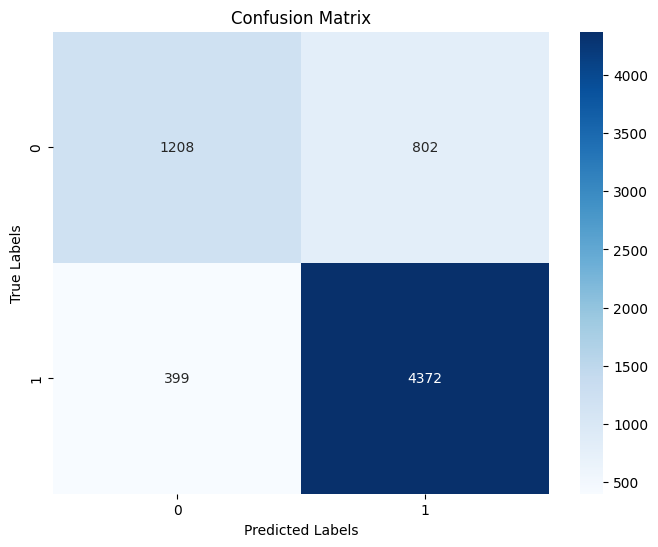

In [ ]:
#LASSO (alpha = 0.001) importance > 0.02
import time
start_time = time.time()
models = { 'Logistic Regression': LogisticRegression(),
            'SVC': SVC(),
           'Random Forest': RandomForestClassifier(),
           'KNeighbors':KNeighborsClassifier(),
           #'Gradient Boosting':GradientBoostingClassifier(),
            'Decision Tree':DecisionTreeClassifier(),
          #'MLPClassifier': MLPClassifier()
          }


params = { 'Logistic Regression': {},
          'SVC': {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf','poly']},
           'Random Forest': {'randomforest__n_estimators': [15, 30, 60, 120],
                            'randomforest__max_depth': [None, 2, 3, 5, 10],
                            'randomforest__min_samples_leaf': [None, 1, 3, 10],
                            'randomforest__min_samples_split': [None, 2, 3, 10]},
           'KNeighbors':{'kneighbors__n_neighbors': [1,3,5,10,15],
                      'kneighbors__leaf_size':[1,3,5], 'kneighbors__p':[1]},
           #'Gradient Boosting':{},
           'Decision Tree':{'decisiontree__max_features': [None, 5, 10], 'decisiontree__criterion': ['gini', 'entropy']}}
#'MLPClassifier':{'mlpclassifier__solver':['sgd', 'adam'],
 #                         'mlpclassifier__activation':['relu', 'tanh'],
  #                        'mlpclassifier__alpha':[0.01, 0.05, 0.001, 0.005, 0.0001],
   #                       'mlpclassifier__hidden_layer_sizes':[(50,50,50), (50,100,50), (100,),],




results = pd.DataFrame(columns=['Model', 'Parameters', 'Accuracy'])
for name, model in models.items():
  pipe = Pipeline([('scaler', StandardScaler()),(name.lower().replace(' ',''), model)])
  grid = GridSearchCV(pipe, params[name], cv=5, scoring='accuracy')

  # Fit the gridsearchcv on the train data
  grid.fit(X_train_lasso_selected, y_train)

  # Predict on the test data
  y_pred = grid.predict(X_test_lasso_selected)

  # Compute the accuracy score
  acc = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  auroc = roc_auc_score(y_test, y_pred)
  # Append the results to the dataframe
  results = results.append({'Model': name, 'Parameters': grid.best_params_, 'Accuracy': acc,'Precision':precision,'Recall':recall,'F1':f1,'AURoc':auroc}, ignore_index=True)
  print(results)

  # Confusion matrix
  from sklearn import metrics
  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()

test_4=pd.DataFrame({'actual':y_test, 'pred':y_pred})
results = results.sort_values(by='Accuracy', ascending=False)
#end_time = time.time()
results

In [ ]:
LogisticRegression().get_params()

NameError: ignored

In [ ]:
SVC().get_params()

NameError: ignored

In [ ]:
DecisionTreeClassifier().get_params()

NameError: ignored

In [ ]:
RandomForestClassifier().get_params()


In [ ]:
KNeighborsClassifier().get_params()

In [ ]:
#LASSO (alpha = 0.001) importance > 0.02
import time
start_time = time.time()
models = {# 'Logistic Regression': LogisticRegression(),
          #  'Random Forest': RandomForestClassifier(),
          #  'KNeighbors':KNeighborsClassifier(),
          #  'Gradient Boosting':GradientBoostingClassifier(),
            #'Decision Tree':DecisionTreeClassifier(),
          'MLPClassifier': MLPClassifier()
          }


params = { #'Logistic Regression': {},
          #  'Random Forest': {'randomforest__n_estimators': [15, 30, 60, 120],
          #                   'randomforest__max_depth': [None, 2, 3, 5, 10],
          #                   'randomforest__min_samples_leaf': [None, 1, 3, 10],
          #                   'randomforest__min_samples_split': [None, 2, 3, 10]},
          #  'KNeighbors':{'kneighbors__n_neighbors': [1,3,5,10,15],
          #             'kneighbors__leaf_size':[1,3,5], 'kneighbors__p':[1]},
          #  'Gradient Boosting':{},
          #  'Decision Tree':{'decisiontree__max_features': [None, 5, 10], 'decisiontree__criterion': ['gini', 'entropy']}}
'MLPClassifier':{'mlpclassifier__solver':['sgd', 'adam'],
                         'mlpclassifier__activation':['relu', 'tanh'],
                         'mlpclassifier__alpha':[0.01, 0.05, 0.001, 0.005, 0.0001],
                         'mlpclassifier__hidden_layer_sizes':[(50,50,50), (50,100,50), (100,),],
}
}

results = pd.DataFrame(columns=['Model', 'Parameters', 'Accuracy'])
for name, model in models.items():
  pipe = Pipeline([('scaler', StandardScaler()),(name.lower().replace(' ',''), model)])
  grid = GridSearchCV(pipe, params[name], cv=5, scoring='accuracy')

  # Fit the gridsearchcv on the train data
  grid.fit(X_train_lasso_selected, y_train)

  # Predict on the test data
  y_pred = grid.predict(X_test_lasso_selected)

  # Compute the accuracy score
  acc = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  auroc = roc_auc_score(y_test, y_pred)
  # Append the results to the dataframe
  results = results.append({'Model': name, 'Parameters': grid.best_params_, 'Accuracy': acc,'Precision':precision,'Recall':recall,'F1':f1,'AURoc':auroc}, ignore_index=True)
  print(results)

  # Confusion matrix
  from sklearn import metrics
  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()

test_4=pd.DataFrame({'actual':y_test, 'pred':y_pred})
results = results.sort_values(by='Accuracy', ascending=False)
#end_time = time.time()
results

In [ ]:
MLPClassifier().get_params()